In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import torch
import os

import wandb # TODO: use this..

from nets.nets import GenericNC, BasicMLP, BasicCNN
from nets.unet import UNet
from nets.resnet import ResNetBase
from utils.utils import load_images_from_directory, plot_images

c:\Users\garth\anaconda3\envs\ddn\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
args = dict(
        batch=100, 
        dir_input = 'data/samples/img/',
        dir_output = 'data/samples/col/',
        out_type = 'colour',
        grayscale=False,
        
        gpu=0,
        iters=1000, 
        trials=3, 
        method='exact',
        mat_type='general',
        loss_on='second_smallest',
        net='cnn',
        size = (96,96),
        width = 50,
        laplace = None,
        lr=1e-3,
        seed = 0
    )

experiment = wandb.init(project='DDN-NC', config=args, mode='disabled', allow_val_change=True)
    # disabled and allow val changes... otherwise enable and use sweep to set different params
args = wandb.config

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


In [5]:
X_input = load_images_from_directory(args.dir_input, num=args.batch, size=args.size, gray=args.grayscale)
Q_true_col = load_images_from_directory('data/samples/col/', num=args.batch, size=args.size, gray=True)
Q_true_tex = load_images_from_directory('data/samples/tex/', num=args.batch, size=args.size, gray=True)


print(f'{X_input.shape} {Q_true_col.shape}')

torch.Size([100, 3, 96, 96]) torch.Size([100, 96, 96])


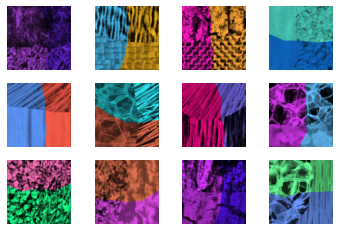

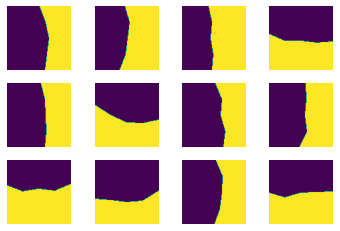

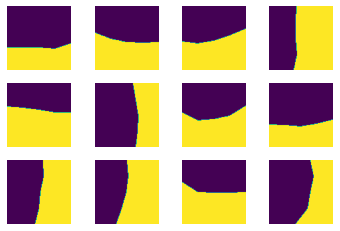

In [7]:
plot_images(X_input[:12].permute(0,2,3,1))
plot_images(Q_true_col[:12])
plot_images(Q_true_tex[:12])